In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd



In [16]:
# Обираємо сайт для скрапінгу
url = "https://finance.yahoo.com/quote/GOOG"  # Приклад: сторінка з біржовими даними Apple


In [17]:
# Отримання HTML-коду сторінки
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Витягуємо заголовок сторінки
page_title = soup.title.text

# Витягуємо всі заголовки h1, h2, h3
headings = {f"h{num}": [tag.text for tag in soup.find_all(f"h{num}")] for num in range(1, 4)}

# Витягуємо всі параграфи
paragraphs = [p.text for p in soup.find_all("p")]

# Витягуємо всі посилання
links = {a.text.strip(): a["href"] for a in soup.find_all("a", href=True)}

# Витягуємо всі зображення
images = [img["src"] for img in soup.find_all("img", src=True)]

# Витягуємо таблиці даних (наприклад, біржові показники)
tables = []
for table in soup.find_all("table"):
    rows = []
    for row in table.find_all("tr"):
        cols = [col.text.strip() for col in row.find_all(["td", "th"])]
        rows.append(cols)
    tables.append(pd.DataFrame(rows))

# Витягуємо мета-дані сторінки (SEO)
meta_description = soup.find("meta", attrs={"name": "description"})
meta_keywords = soup.find("meta", attrs={"name": "keywords"})
meta_data = {
    "title": page_title,
    "description": meta_description["content"] if meta_description else "N/A",
    "keywords": meta_keywords["content"] if meta_keywords else "N/A",
}


In [18]:
# Виводимо результати
print(f"📌 Заголовок сторінки: {page_title}")
print(f"📊 Заголовки: {headings}")
print(f"📄 Перші 5 параграфів: {paragraphs[:5]}")
print(f"🔗 Перші 5 посилань: {list(links.items())[:5]}")
print(f"🖼️ Перші 5 зображень: {images[:5]}")
print(f"🔍 Мета-дані: {meta_data}")


📌 Заголовок сторінки: Alphabet Inc. (GOOG) Stock Price, News, Quote & History - Yahoo Finance
📊 Заголовки: {'h1': ['Yahoo Finance', 'Alphabet Inc. (GOOG)'], 'h2': ['Alphabet Inc. Overview Internet Content & Information / Communication Services'], 'h3': [' News', ' Life', ' Entertainment', '  Finance', ' Sports', 'New on Yahoo', '1.83%', '6.70%', '19.63%', '6.70%', '34.34%', '182.45%', '8,154.83%', 'Full Time Employees', 'Fiscal Year Ends', 'Sector', 'Industry', 'Recent News: GOOG', 'Performance Overview: GOOG', 'YTD Return', '1-Year Return', '3-Year Return', '5-Year Return', 'Compare To: GOOG', 'Statistics: GOOG', 'Valuation Measures ', 'Financial Highlights ', 'Research Analysis: GOOG', 'People Also Watch']}
📄 Перші 5 параграфів: ['Alphabet Inc. offers various products and platforms in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment p

In [22]:

# Збереження таблиць у CSV
for i, df in enumerate(tables):
    df.to_csv(f"table_{i}.csv", index=False)
    print(f"📥 Таблиця {i} збережена у table_{i}.csv")

📥 Таблиця 0 збережена у table_0.csv


In [23]:
!pip install wordcloud

Python(51654) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip


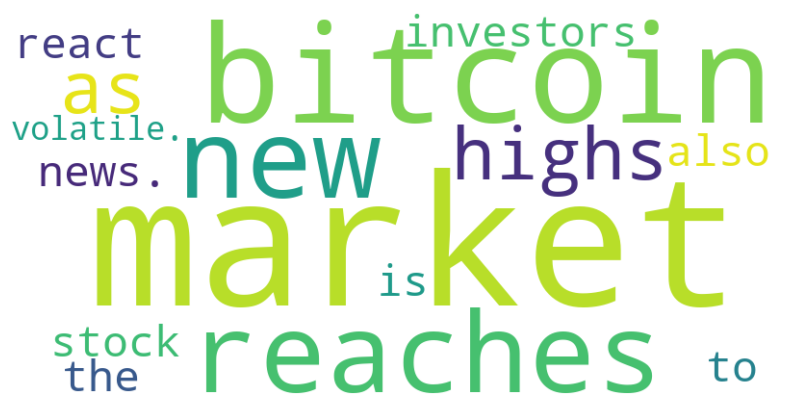

             Website  Count
0  finance.yahoo.com      1
1  www.investing.com      1


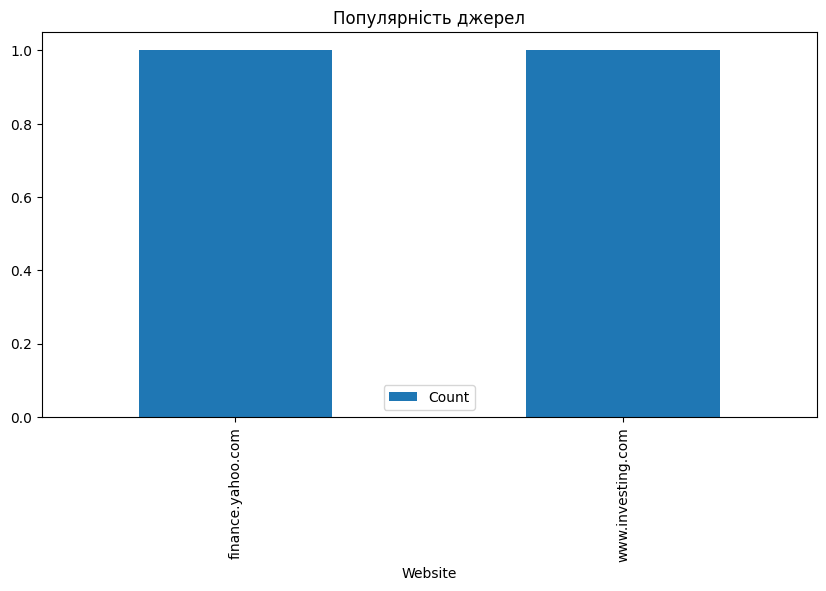

✅ Завантажено https://example.com/image1.jpg
✅ Завантажено https://example.com/image2.jpg


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import wordcloud
from collections import Counter
from wordcloud import WordCloud
import os

# 1️⃣ Аналіз фінансових даних з таблиць CSV (Yahoo Finance, Investing)
def analyze_financial_data(file):
    df = pd.read_csv(file)
    print(df.head())  # Переглянемо перші 5 рядків

    # Припустимо, що у нас є колонка "Ціна" (Price) та "Дата" (Date)
    if "Price" in df.columns and "Date" in df.columns:
        df["Date"] = pd.to_datetime(df["Date"])  # Перетворимо на формат дати
        df["Price"] = pd.to_numeric(df["Price"], errors="coerce")  # Конвертація в число
        df.set_index("Date", inplace=True)
        df["Price"].plot(title="Динаміка ціни", figsize=(10, 5))
        plt.show()

# 2️⃣ Аналіз ключових слів у новинах
def analyze_text_data(text_data):
    words = text_data.lower().split()  # Розбиваємо текст на слова
    word_counts = Counter(words)  # Рахуємо частоту слів

    # Візуалізація частоти слів
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# 3️⃣ Аналіз популярності джерел за посиланнями
def analyze_links(links):
    domains = [url.split("/")[2] for url in links.values() if url.startswith("http")]
    domain_counts = Counter(domains)
    top_domains = pd.DataFrame(domain_counts.items(), columns=["Website", "Count"]).sort_values(by="Count", ascending=False)
    print(top_domains.head(10))  # Топ-10 сайтів
    top_domains.set_index("Website").plot(kind="bar", figsize=(10, 5), title="Популярність джерел")
    plt.show()

# 4️⃣ Завантаження та аналіз зображень
def download_images(images):
    os.makedirs("images", exist_ok=True)  # Створимо папку для зображень
    for idx, img_url in enumerate(images[:5]):  # Завантажимо перші 5 зображень
        try:
            img_data = requests.get(img_url).content
            with open(f"images/image_{idx}.jpg", "wb") as f:
                f.write(img_data)
            print(f"✅ Завантажено {img_url}")
        except:
            print(f"❌ Помилка завантаження {img_url}")

# 🔹 Приклад даних (можна передавати отримані з веб-скрапінгу)
text_data = "Bitcoin reaches new highs as investors react to market news. The stock market is also volatile."
links = {"Yahoo Finance": "https://finance.yahoo.com", "Investing": "https://www.investing.com"}
images = ["https://example.com/image1.jpg", "https://example.com/image2.jpg"]

# Виконання аналізу
analyze_text_data(text_data)
analyze_links(links)
download_images(images)
